In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpalbaico5/pubring.gpg' created
gpg: /tmp/tmpalbaico5/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!pip install tensorflow-gpu==1.4.0 --ignore-installed
!pip install keras==2.0.8 --ignore-installed

  Using cached https://files.pythonhosted.org/packages/08/47/bc3ccd2ecae8f9f18a93c683a66339714090a36e1b69307787fb28e72e2b/tensorflow_gpu-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/30/e935244ca6165187ae8be876b6316ae201b71485538ffac1d718843025a9/wheel-0.31.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/ad/ecd865eb1ba1ff7f6bd6bcb731a89d55bc0450ced8d457ed2d167c7b8d5f/protobuf-3.5.2.post1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/90/ca61e203e0080a8cef7ac21eca199829fa8d997f7c4da3e985b49d0a107d/numpy-1.14.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e9/9f/5845c18f9df5e7ea638ecf3a272238f0e7671e454faa396b5188c6e6fc0a/tensorflow_tensorboard-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  

In [2]:
!pip install keras==2.0.8 --ignore-installed

    100% |████████████████████████████████| 276kB 7.1MB/s 
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/90/ca61e203e0080a8cef7ac21eca199829fa8d997f7c4da3e985b49d0a107d/numpy-1.14.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl


In [1]:
import tensorflow as tf

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
tf.__version__

'1.4.0'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
keras.__version__

'2.0.8'

In [5]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5770696222026891306, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 235929600
 locality {
   bus_id: 1
 }
 incarnation: 3447014305531255802
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.activations import softmax

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [0]:
batch_size = 32
num_classes = 10
epochs = 20
num_predictions = 20

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[6]


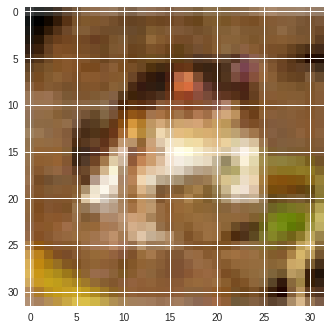

In [14]:
print(y_train[0])
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# model build
model = Sequential()

model.add(Conv2D(32, (3,3),
                padding = 'same',
                activation = 'relu',
                input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: ignored

In [0]:
optimizer = keras.optimizers.adam(lr=0.0001)
model.compile(loss=keras.losses.categorical_crossentropy
             , optimizer=optimizer
             , metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train
         , batch_size=batch_size
         , epochs = epochs
         , validation_data=(x_test, y_test)
         , shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 37s - loss: 1.7471 - acc: 0.3556 - val_loss: 1.4271 - val_acc: 0.4822
Epoch 2/20
 7488/50000 [===>..........................] - ETA: 27s - loss: 1.5039 - acc: 0.4555

50000/50000 [==============================] - 34s - loss: 1.4218 - acc: 0.4873 - val_loss: 1.3038 - val_acc: 0.5333
Epoch 3/20
27936/50000 [===============>..............] - ETA: 14s - loss: 1.3188 - acc: 0.5274

50000/50000 [==============================] - 33s - loss: 1.2896 - acc: 0.5386 - val_loss: 1.1534 - val_acc: 0.5894
Epoch 4/20
35936/50000 [====================>.........] - ETA: 9s - loss: 1.1993 - acc: 0.5728

50000/50000 [==============================] - 33s - loss: 1.1885 - acc: 0.5774 - val_loss: 1.0678 - val_acc: 0.6259
Epoch 5/20
39104/50000 [======================>.......] - ETA: 7s - loss: 1.1124 - acc: 0.6098

50000/50000 [==============================] - 33s - loss: 1.1069 - acc: 0.6102 - val_loss: 1.0159 - val_acc: 0.6404
Epoch 6/20
40704/50000 [=======================>......] - ETA: 5s - loss: 1.0466 - acc: 0.6324

50000/50000 [==============================] - 33s - loss: 1.0454 - acc: 0.6326 - val_loss: 0.9511 - val_acc: 0.6699
Epoch 7/20
41248/50000 [=======================>......] - ETA: 5s - loss: 0.9979 - acc: 0.6503

50000/50000 [==============================] - 33s - loss: 0.9920 - acc: 0.6525 - val_loss: 0.9021 - val_acc: 0.6846
Epoch 8/20
41312/50000 [=======================>......] - ETA: 5s - loss: 0.9486 - acc: 0.6644

50000/50000 [==============================] - 33s - loss: 0.9476 - acc: 0.6648 - val_loss: 0.8649 - val_acc: 0.6991
Epoch 9/20
41568/50000 [=======================>......] - ETA: 5s - loss: 0.9100 - acc: 0.6822

50000/50000 [==============================] - 33s - loss: 0.9054 - acc: 0.6831 - val_loss: 0.8402 - val_acc: 0.7085
Epoch 10/20
41440/50000 [=======================>......] - ETA: 5s - loss: 0.8700 - acc: 0.6933

50000/50000 [==============================] - 33s - loss: 0.8687 - acc: 0.6944 - val_loss: 0.8277 - val_acc: 0.7130
Epoch 11/20
41312/50000 [=======================>......] - ETA: 5s - loss: 0.8445 - acc: 0.7039

50000/50000 [==============================] - 33s - loss: 0.8436 - acc: 0.7043 - val_loss: 0.8032 - val_acc: 0.7214
Epoch 12/20
41440/50000 [=======================>......] - ETA: 5s - loss: 0.8078 - acc: 0.7159

50000/50000 [==============================] - 33s - loss: 0.8068 - acc: 0.7163 - val_loss: 0.7654 - val_acc: 0.7336
Epoch 13/20
41280/50000 [=======================>......] - ETA: 5s - loss: 0.7800 - acc: 0.7252

50000/50000 [==============================] - 33s - loss: 0.7783 - acc: 0.7258 - val_loss: 0.7515 - val_acc: 0.7393
Epoch 14/20
41248/50000 [=======================>......] - ETA: 5s - loss: 0.7530 - acc: 0.7367

50000/50000 [==============================] - 33s - loss: 0.7515 - acc: 0.7371 - val_loss: 0.7470 - val_acc: 0.7401
Epoch 15/20
41216/50000 [=======================>......] - ETA: 5s - loss: 0.7311 - acc: 0.7444

50000/50000 [==============================] - 33s - loss: 0.7281 - acc: 0.7453 - val_loss: 0.7445 - val_acc: 0.7410
Epoch 16/20
41408/50000 [=======================>......] - ETA: 5s - loss: 0.7077 - acc: 0.7508

50000/50000 [==============================] - 33s - loss: 0.7061 - acc: 0.7514 - val_loss: 0.7216 - val_acc: 0.7498
Epoch 17/20
41472/50000 [=======================>......] - ETA: 5s - loss: 0.6735 - acc: 0.7598

50000/50000 [==============================] - 33s - loss: 0.6771 - acc: 0.7589 - val_loss: 0.7058 - val_acc: 0.7591
Epoch 18/20
41504/50000 [=======================>......] - ETA: 5s - loss: 0.6644 - acc: 0.7678

50000/50000 [==============================] - 33s - loss: 0.6630 - acc: 0.7679 - val_loss: 0.6863 - val_acc: 0.7652
Epoch 19/20
41504/50000 [=======================>......] - ETA: 5s - loss: 0.6405 - acc: 0.7743

50000/50000 [==============================] - 33s - loss: 0.6402 - acc: 0.7747 - val_loss: 0.6861 - val_acc: 0.7617
Epoch 20/20
41408/50000 [=======================>......] - ETA: 5s - loss: 0.6188 - acc: 0.7844

50000/50000 [==============================] - 33s - loss: 0.6197 - acc: 0.7838 - val_loss: 0.6819 - val_acc: 0.7643


In [21]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

 9760/10000 [============================>.] - ETA: 0sTest loss: 0.6819099401950837
Test accuracy: 0.7643


In [34]:
sample_res = model.predict_proba(x_test[0].reshape(1,32,32,3))
sample_res = model.predict_proba(x_test)

 9760/10000 [============================>.] - ETA: 0s

In [45]:
res = np.argmax(sample_res, axis = 1)
res

array([3, 8, 8, ..., 5, 4, 7])

In [46]:
ans = np.argmax(y_test, axis = 1)
ans

array([3, 8, 8, ..., 5, 1, 7])

In [48]:
correct = (res== ans)
accuracy = correct.sum() / correct.size
accuracy

0.7643

In [30]:
import numpy as np
np.argmax(sample_res)

3

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


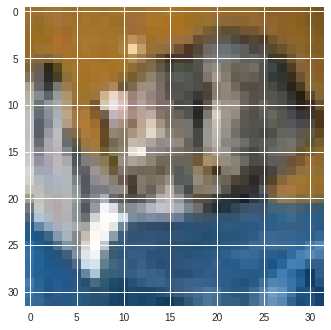

In [31]:
print(y_train[0])
from matplotlib import pyplot as plt
plt.imshow(x_test[0])
plt.show()

In [33]:
np.argmax(y_test[0])

3

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [0]:
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [58]:
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch = 1000)

Epoch 1/20
1000/1000 [==============================] - 30s - loss: 0.7268 - acc: 0.7474 - val_loss: 0.6081 - val_acc: 0.7898
Epoch 2/20
 506/1000 [==============>...............] - ETA: 14s - loss: 0.7222 - acc: 0.7464

1000/1000 [==============================] - 30s - loss: 0.7260 - acc: 0.7454 - val_loss: 0.5968 - val_acc: 0.7937
Epoch 3/20
 760/1000 [=====================>........] - ETA: 7s - loss: 0.7165 - acc: 0.7509

1000/1000 [==============================] - 30s - loss: 0.7166 - acc: 0.7507 - val_loss: 0.6006 - val_acc: 0.7921
Epoch 4/20
 883/1000 [=========================>....] - ETA: 3s - loss: 0.7104 - acc: 0.7512

1000/1000 [==============================] - 30s - loss: 0.7136 - acc: 0.7506 - val_loss: 0.5949 - val_acc: 0.7966
Epoch 5/20
 938/1000 [===========================>..] - ETA: 1s - loss: 0.7037 - acc: 0.7547

1000/1000 [==============================] - 30s - loss: 0.7040 - acc: 0.7541 - val_loss: 0.6078 - val_acc: 0.7897
Epoch 6/20
 964/1000 [===========================>..] - ETA: 1s - loss: 0.6993 - acc: 0.7552

1000/1000 [==============================] - 30s - loss: 0.6979 - acc: 0.7554 - val_loss: 0.5845 - val_acc: 0.7995
Epoch 7/20
 986/1000 [============================>.] - ETA: 0s - loss: 0.6963 - acc: 0.7566

1000/1000 [==============================] - 30s - loss: 0.6958 - acc: 0.7569 - val_loss: 0.5856 - val_acc: 0.8000
Epoch 8/20
 968/1000 [============================>.] - ETA: 0s - loss: 0.6931 - acc: 0.7575

1000/1000 [==============================] - 30s - loss: 0.6928 - acc: 0.7578 - val_loss: 0.5864 - val_acc: 0.7965
Epoch 9/20
 969/1000 [============================>.] - ETA: 0s - loss: 0.6881 - acc: 0.7614

1000/1000 [==============================] - 30s - loss: 0.6872 - acc: 0.7615 - val_loss: 0.5838 - val_acc: 0.7993
Epoch 10/20
 967/1000 [============================>.] - ETA: 0s - loss: 0.6775 - acc: 0.7645

1000/1000 [==============================] - 30s - loss: 0.6775 - acc: 0.7644 - val_loss: 0.5740 - val_acc: 0.8017
Epoch 11/20
 958/1000 [===========================>..] - ETA: 1s - loss: 0.6796 - acc: 0.7607

1000/1000 [==============================] - 30s - loss: 0.6789 - acc: 0.7611 - val_loss: 0.5683 - val_acc: 0.8030
Epoch 12/20
 960/1000 [===========================>..] - ETA: 1s - loss: 0.6751 - acc: 0.7657

1000/1000 [==============================] - 30s - loss: 0.6751 - acc: 0.7654 - val_loss: 0.5636 - val_acc: 0.8027
Epoch 13/20
 975/1000 [============================>.] - ETA: 0s - loss: 0.6664 - acc: 0.7649

1000/1000 [==============================] - 30s - loss: 0.6664 - acc: 0.7648 - val_loss: 0.5652 - val_acc: 0.8043
Epoch 14/20
 986/1000 [============================>.] - ETA: 0s - loss: 0.6623 - acc: 0.7670

1000/1000 [==============================] - 30s - loss: 0.6616 - acc: 0.7672 - val_loss: 0.5595 - val_acc: 0.8070
Epoch 15/20
 978/1000 [============================>.] - ETA: 0s - loss: 0.6527 - acc: 0.7705

1000/1000 [==============================] - 30s - loss: 0.6540 - acc: 0.7705 - val_loss: 0.5681 - val_acc: 0.8065
Epoch 16/20
 979/1000 [============================>.] - ETA: 0s - loss: 0.6591 - acc: 0.7699

1000/1000 [==============================] - 30s - loss: 0.6597 - acc: 0.7695 - val_loss: 0.5681 - val_acc: 0.8028
Epoch 17/20
 984/1000 [============================>.] - ETA: 0s - loss: 0.6530 - acc: 0.7728

1000/1000 [==============================] - 30s - loss: 0.6530 - acc: 0.7731 - val_loss: 0.5652 - val_acc: 0.8052
Epoch 18/20
 971/1000 [============================>.] - ETA: 0s - loss: 0.6404 - acc: 0.7765

1000/1000 [==============================] - 30s - loss: 0.6409 - acc: 0.7764 - val_loss: 0.5481 - val_acc: 0.8108
Epoch 19/20
 952/1000 [===========================>..] - ETA: 1s - loss: 0.6490 - acc: 0.7720

1000/1000 [==============================] - 30s - loss: 0.6493 - acc: 0.7718 - val_loss: 0.5497 - val_acc: 0.8092
Epoch 20/20
 952/1000 [===========================>..] - ETA: 1s - loss: 0.6348 - acc: 0.7789

1000/1000 [==============================] - 30s - loss: 0.6341 - acc: 0.7790 - val_loss: 0.5415 - val_acc: 0.8144
